In [1]:
pip install pandas numpy matplotlib seaborn Pillow scikit-learn nltk 

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Data processing
import pandas as pd
import numpy as np
import random
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os  # For interacting with the file system


In [2]:
STYLES_CSV = "/home/hammad/fyp/dataset_fashion/styles.csv"
IMAGES_DIR = "/home/hammad/fyp/dataset_fashion/images"

In [3]:
styles = pd.read_csv(STYLES_CSV, on_bad_lines='skip')

In [4]:
styles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [5]:
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [6]:
styles.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

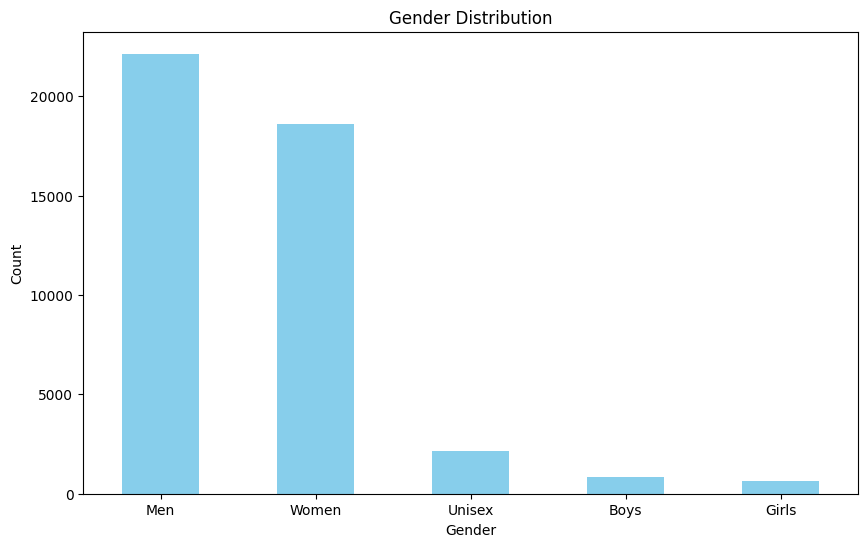

In [7]:
plt.figure(figsize=(10,6))
styles['gender'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

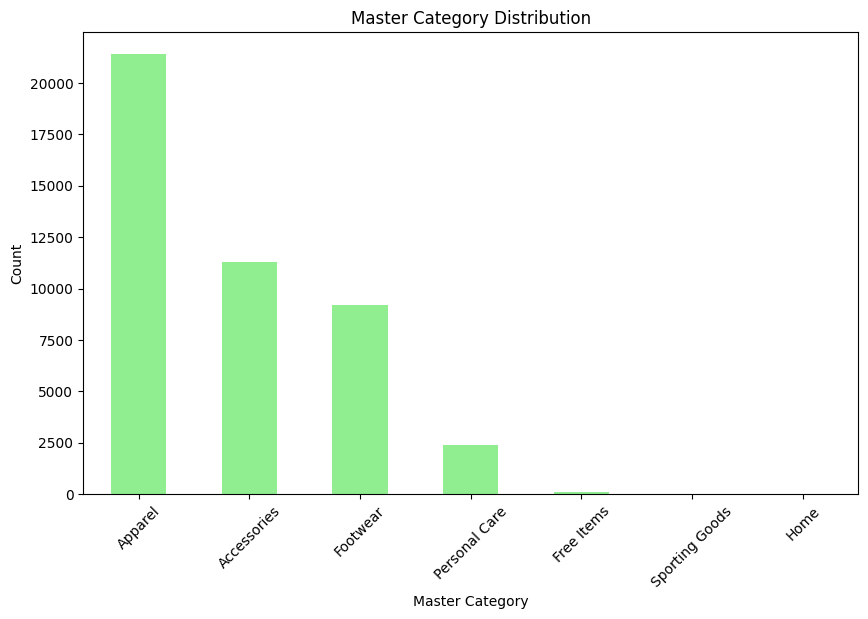

In [8]:
plt.figure(figsize=(10,6))
styles['masterCategory'].value_counts().plot(kind='bar',color='lightgreen')
plt.title('Master Category Distribution')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

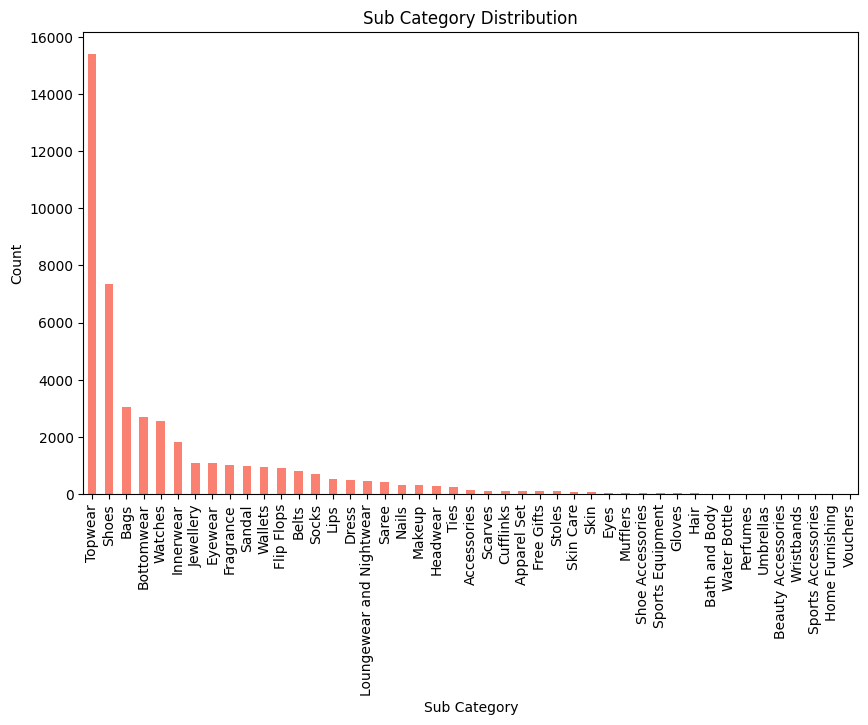

In [9]:
plt.figure(figsize=(10, 6))
styles['subCategory'].value_counts().plot(kind='bar', color='salmon')
plt.title('Sub Category Distribution')
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

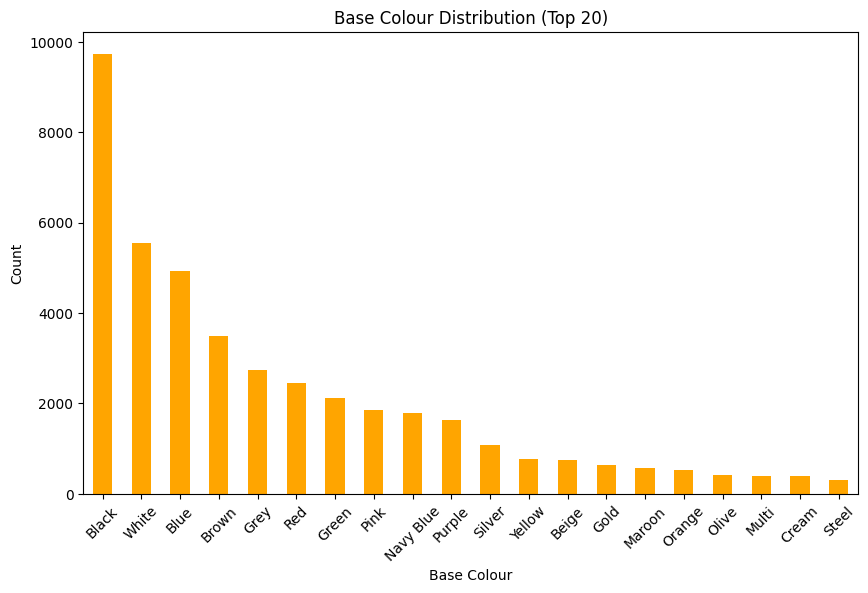

In [10]:
plt.figure(figsize=(10, 6))
styles['baseColour'].value_counts().head(20).plot(kind='bar', color='orange')  # Top 20 base colors
plt.title('Base Colour Distribution (Top 20)')
plt.xlabel('Base Colour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

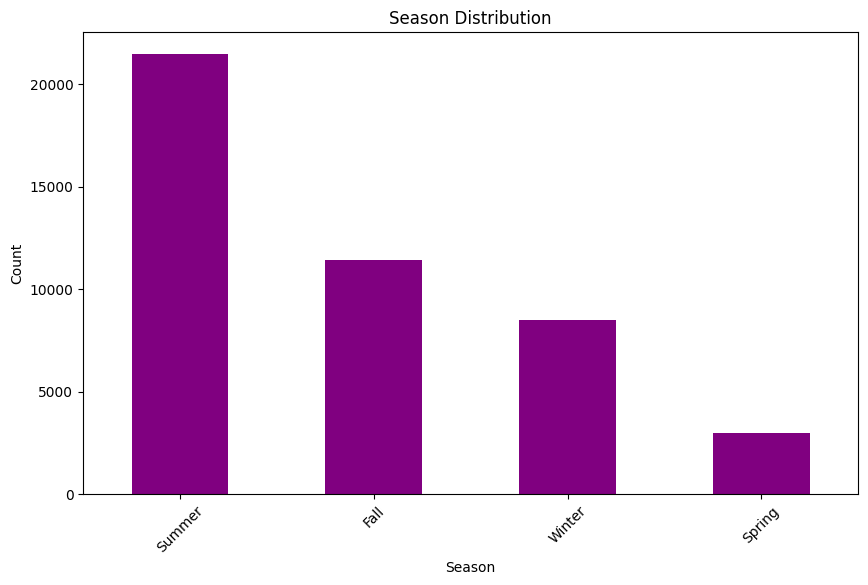

In [11]:
plt.figure(figsize=(10, 6))
styles['season'].value_counts().plot(kind='bar', color='purple')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


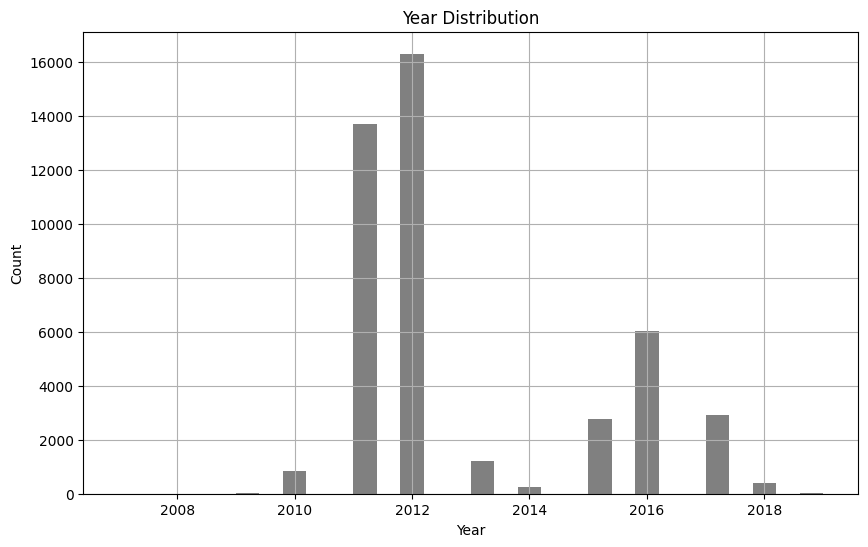

In [12]:
# Check distribution of 'year' (this could be a continuous value, so histogram might work better)
plt.figure(figsize=(10, 6))
styles['year'].hist(bins=30, color='gray')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [13]:
# Check for duplicate IDs
duplicates = styles[styles.duplicated(subset=['id'])]
print(f"Number of duplicate rows: {duplicates.shape[0]}")


Number of duplicate rows: 0


In [14]:
# 1. Split data into Unisex and non-Unisex rows
unisex_data = styles[styles['gender'] == 'Unisex']
non_unisex_data = styles[styles['gender'] != 'Unisex']

# 2. Map non-Unisex gender labels to standard 'male' and 'female'
non_unisex_mapped = non_unisex_data.copy()
non_unisex_mapped['gender'] = non_unisex_mapped['gender'].map({
    'Boys': 'male',
    'Girls': 'female',
    'Men': 'male',
    'Women': 'female'
})

# 3. Duplicate Unisex entries and assign half to male, half to female
unisex_mapped = pd.concat([unisex_data.copy(), unisex_data.copy()], ignore_index=True)
unisex_mapped['gender'] = ['male', 'female'] * (len(unisex_data))

# 4. Combine all mapped data
cleaned_data = pd.concat([non_unisex_mapped, unisex_mapped], ignore_index=True)

In [15]:
def get_category(row):
    if row['subCategory'] == 'Topwear':
        return 'top'
    elif row['subCategory'] == 'Bottomwear':
        return 'bottom'
    elif row['subCategory'] == 'Shoes':
        return 'footwear'
    else:
        return None

In [16]:
cleaned_data['category'] = cleaned_data.apply(get_category, axis=1)

In [17]:
filtered = cleaned_data[
    (cleaned_data['category'].isin(['top', 'bottom', 'footwear'])) &
    (cleaned_data['usage'].isin(['Casual', 'Smart Casual', 'Formal', 'Sports']))
]

In [18]:
filtered['style'] = filtered['usage'].replace({
    'Casual': 'casual',
    'Smart Casual': 'casual',
    'Formal': 'formal',
    'Sports': 'sportswear'
})

/tmp/ipykernel_162340/2779249596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['style'] = filtered['usage'].replace({


In [19]:
final_data = filtered[[
    'id', 'gender', 'category', 'style', 'baseColour', 'productDisplayName'
]].dropna()


In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23304 entries, 0 to 46583
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  23304 non-null  int64 
 1   gender              23304 non-null  object
 2   category            23304 non-null  object
 3   style               23304 non-null  object
 4   baseColour          23304 non-null  object
 5   productDisplayName  23304 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [21]:
final_data.head()

,id,gender,category,style,baseColour,productDisplayName
0,15970,male,top,casual,Navy Blue,Turtle Check Men Navy Blue Shirt
1,39386,male,bottom,casual,Blue,Peter England Men Party Blue Jeans
3,21379,male,bottom,casual,Black,Manchester United Men Solid Black Track Pants
4,53759,male,top,casual,Grey,Puma Men Grey T-shirt
5,1855,male,top,casual,Grey,Inkfruit Mens Chain Reaction T-shirt


In [22]:
# Get counts for masterCategory
print("gender Counts:\n", final_data['gender'].value_counts())

# Get counts for subCategory
print("\nCategory Counts:\n", final_data['category'].value_counts())
print("---------------------------------")

# Get for color
print("\nColor Counts:\n", final_data['baseColour'].value_counts())

# Get for color
print("\nStyle Counts:\n", final_data['style'].value_counts())



gender Counts:
 gender
male      15715
female     7589
Name: count, dtype: int64

Category Counts:
 category
top         13176
footwear     7588
bottom       2540
Name: count, dtype: int64
---------------------------------

Color Counts:
 baseColour
Black                4837
White                3575
Blue                 3288
Grey                 1804
Brown                1398
Red                  1340
Navy Blue            1198
Green                1183
Purple                834
Pink                  795
Yellow                541
Beige                 351
Orange                251
Maroon                246
Olive                 196
Silver                192
Gold                  145
Cream                 144
Charcoal              138
Multi                 101
Peach                  93
Khaki                  92
Off White              89
Tan                    66
Lavender               58
Magenta                55
Grey Melange           52
Teal                   51
Bronze                

In [28]:
print("Duplicate ID count:", final_data['id'].duplicated().sum())

Duplicate ID count: 353


In [29]:
final_data = final_data.drop_duplicates(subset='id', keep='first').reset_index(drop=True)

In [44]:
ids = final_data['id'].astype(str).str.strip()
ids_set = set(ids)
image_files= os.listdir(IMAGES_DIR)
# to_delete = [img for img in image_files if os.path.splitext(img)[0] not in ids_set]
# print("Sample unmatched filenames:", to_delete[:10])


# print(f"Total images in folder: {len(image_files)}")
# print(f"Total IDs in final_data: {len(ids_set)}")

# # How many match
# matched = sum(1 for img_file in image_files if os.path.splitext(img_file)[0].strip() in ids_set)
# print(f"Matching image IDs: {matched}")

# Loop through and delete unwanted images
deleted_count = 0
for img_file in image_files:
    img_id, ext = os.path.splitext(img_file)
    if ext.lower() == '.jpg' and img_id not in ids_set:
        try:
            os.remove(os.path.join(IMAGES_DIR,img_file))
            deleted_count += 1
        except Exception as e:
            print(f"Error deleting {img_file}: {e}")

print(f"Deleted {deleted_count} images not in cleaned dataset.")

Deleted 21495 images not in cleaned dataset.


In [46]:
# Get counts for masterCategory
print("gender Counts:\n", final_data['gender'].value_counts())

# Get counts for subCategory
print("\nCategory Counts:\n", final_data['category'].value_counts())
print("---------------------------------")

# Get for color
print("\nColor Counts:\n", final_data['baseColour'].value_counts())

# Get for color
print("\nStyle Counts:\n", final_data['style'].value_counts())



gender Counts:
 gender
male      15535
female     7416
Name: count, dtype: int64

Category Counts:
 category
top         13102
footwear     7318
bottom       2531
Name: count, dtype: int64
---------------------------------

Color Counts:
 baseColour
Black                4743
White                3527
Blue                 3241
Grey                 1790
Brown                1385
Red                  1302
Navy Blue            1184
Green                1154
Purple                823
Pink                  782
Yellow                535
Beige                 350
Maroon                241
Orange                238
Olive                 194
Silver                189
Cream                 144
Gold                  144
Charcoal              137
Multi                 101
Peach                  93
Khaki                  92
Off White              89
Tan                    66
Lavender               58
Magenta                55
Grey Melange           52
Teal                   51
Bronze                

In [23]:
final_data = final_data.drop(columns=['productDisplayName'])

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder()
## Label encoding of gender
final_data['gender_encoded'] = label_encoder.fit_transform(final_data['gender'])
## One-hot Encoding of category and style
final_data = pd.get_dummies(final_data, columns=['category'], prefix= 'category')
final_data = pd.get_dummies(final_data, columns=['style'], prefix= 'style')
color_encoder = LabelEncoder()
final_data['baseColour_encoded'] = color_encoder.fit_transform(final_data['baseColour'])



In [26]:

color_mapping = dict(zip(color_encoder.classes_, color_encoder.transform(color_encoder.classes_)))
color_mapping

{'Beige': 0,
 'Black': 1,
 'Blue': 2,
 'Bronze': 3,
 'Brown': 4,
 'Burgundy': 5,
 'Charcoal': 6,
 'Coffee Brown': 7,
 'Copper': 8,
 'Cream': 9,
 'Fluorescent Green': 10,
 'Gold': 11,
 'Green': 12,
 'Grey': 13,
 'Grey Melange': 14,
 'Khaki': 15,
 'Lavender': 16,
 'Lime Green': 17,
 'Magenta': 18,
 'Maroon': 19,
 'Mauve': 20,
 'Metallic': 21,
 'Multi': 22,
 'Mushroom Brown': 23,
 'Mustard': 24,
 'Navy Blue': 25,
 'Nude': 26,
 'Off White': 27,
 'Olive': 28,
 'Orange': 29,
 'Peach': 30,
 'Pink': 31,
 'Purple': 32,
 'Red': 33,
 'Rust': 34,
 'Sea Green': 35,
 'Silver': 36,
 'Tan': 37,
 'Taupe': 38,
 'Teal': 39,
 'Turquoise Blue': 40,
 'White': 41,
 'Yellow': 42}

In [27]:
final_data.head()

,id,gender,baseColour,gender_encoded,category_bottom,category_footwear,category_top,style_casual,style_formal,style_sportswear,baseColour_encoded
0,15970,male,Navy Blue,1,False,False,True,True,False,False,25
1,39386,male,Blue,1,True,False,False,True,False,False,2
3,21379,male,Black,1,True,False,False,True,False,False,1
4,53759,male,Grey,1,False,False,True,True,False,False,13
5,1855,male,Grey,1,False,False,True,True,False,False,13


In [28]:
df_numeric = final_data.copy()

bool_cols = df_numeric.select_dtypes(include='bool').columns
df_numeric[bool_cols] = df_numeric[bool_cols].astype(int)

print(df_numeric.head())

      id gender baseColour  gender_encoded  category_bottom  \
0  15970   male  Navy Blue               1                0   
1  39386   male       Blue               1                1   
3  21379   male      Black               1                1   
4  53759   male       Grey               1                0   
5   1855   male       Grey               1                0   

   category_footwear  category_top  style_casual  style_formal  \
0                  0             1             1             0   
1                  0             0             1             0   
3                  0             0             1             0   
4                  0             1             1             0   
5                  0             1             1             0   

   style_sportswear  baseColour_encoded  
0                 0                  25  
1                 0                   2  
3                 0                   1  
4                 0                  13  
5             

In [29]:
df_numeric = df_numeric.drop(columns =['gender']) 

In [30]:
df_numeric.head()

,id,baseColour,gender_encoded,category_bottom,category_footwear,category_top,style_casual,style_formal,style_sportswear,baseColour_encoded
0,15970,Navy Blue,1,0,0,1,1,0,0,25
1,39386,Blue,1,1,0,0,1,0,0,2
3,21379,Black,1,1,0,0,1,0,0,1
4,53759,Grey,1,0,0,1,1,0,0,13
5,1855,Grey,1,0,0,1,1,0,0,13


In [31]:
CLEANED_CSV_PATH = "/home/hammad/fyp/dataset_fashion/cleaned_styles_colored.csv"
df_numeric.to_csv(CLEANED_CSV_PATH, index=False)
print(f"Saved cleaned data to: {CLEANED_CSV_PATH}")


Saved cleaned data to: /home/hammad/fyp/dataset_fashion/cleaned_styles_colored.csv
